In [49]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [51]:
data=pd.read_csv(r"Estimated_neh_numbers_liverpool_liver_.csv")
print(data.shape)
data=data.dropna()
print(data.shape)

(5459, 20)
(5452, 20)


In [52]:
data.columns

Index(['Protein', 'Peptide', 'Charge', 'T_NEH', 'Asym_NEH', 'MPE_NEH',
       'APE_NEH', 'Asym_RMSE', 'MPE_RMSE', 'APE_RMSE', 'sd_neh', 'sd_rmse',
       'il_neh', 'il_rmse', 'i0_0', 'i1_0', 'i2_0', 'i0_31', 'i1_31', 'i2_31'],
      dtype='object')

In [53]:
(100*data[data.Asym_RMSE < 0.01].shape[0]/data.shape[0],
100*data[data.APE_RMSE < 0.01].shape[0]/data.shape[0],
100*data[data.MPE_RMSE < 0.01].shape[0]/data.shape[0])

(51.92589875275129, 50.220102714600145, 29.236977256052825)

In [63]:
(
data[data.APE_RMSE < 0.01].shape[0],
data[data.MPE_RMSE < 0.01].shape[0],
data[data.Asym_RMSE < 0.01].shape[0],)

(2738, 1594, 2831)

In [54]:
100*data[data.MPE_RMSE < 0.01].shape[0]/data.shape[0]

29.236977256052825

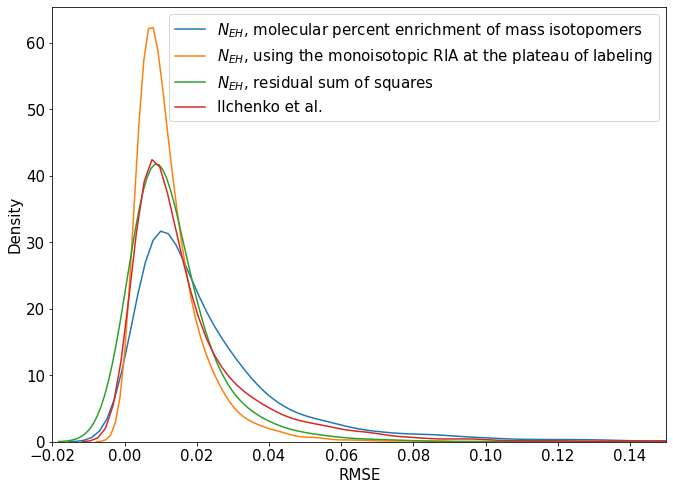

In [55]:
import numpy as np
import seaborn as sns
plt.rc('font', size=15) 
plt.figure(figsize=(11,8))
sns.kdeplot(data.MPE_RMSE, bw=0.2,label=(r"$N_{EH}$, molecular percent enrichment of mass isotopomers"))
sns.kdeplot(data.Asym_RMSE, bw=0.25,label=(r"$N_{EH}$, using the monoisotopic RIA at the plateau of labeling"))
sns.kdeplot(data.APE_RMSE, bw=0.55,label=(r"$N_{EH}$, residual sum of squares"))
sns.kdeplot(data.il_rmse, bw=0.2,label='Ilchenko et al.')
plt.xlabel('RMSE')
plt.legend()
plt.xlim([-0.02,0.15])
plt.savefig("rmse_lv.jpeg",dpi=900,bbox_inches='tight')

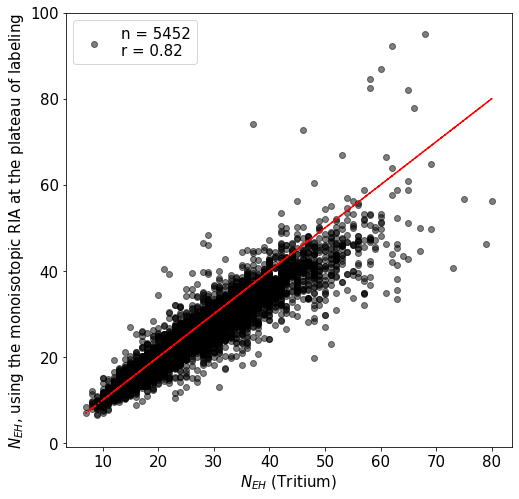

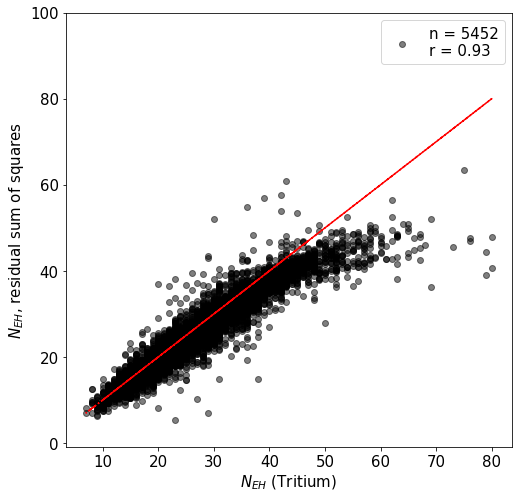

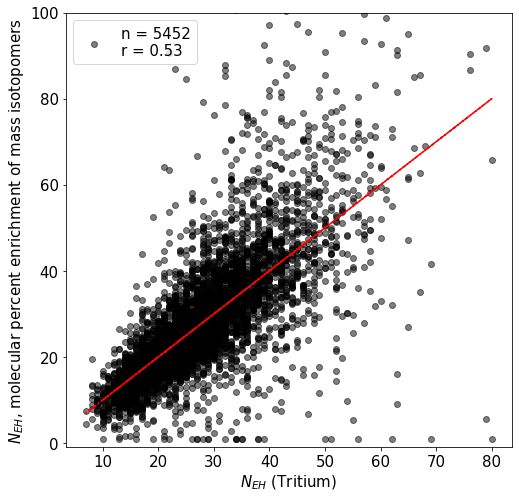

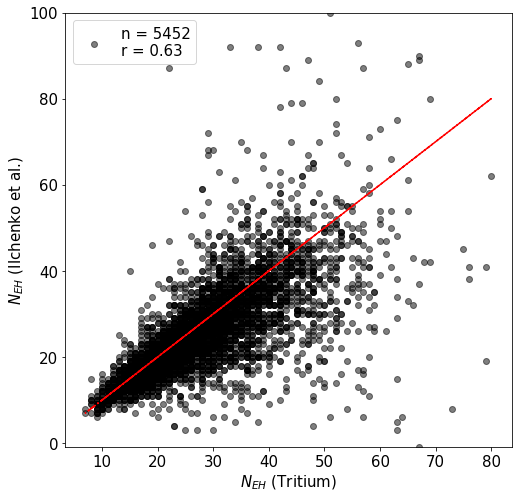

In [56]:
res=[]

plt.rc('font', size=15) 
plt.figure(figsize=(8,8))
plt.scatter(data.T_NEH,data.Asym_NEH,alpha=0.5,
            label=f'n = {data.shape[0]}\n' + 'r = '+'{0:.2f}'.format(np.corrcoef(data.T_NEH,data.Asym_NEH)[0][1]),c='k')
plt.plot(data.T_NEH,data.T_NEH,ls="-.",c='r')
plt.xlabel(r"$N_{EH}$ (Tritium)")
plt.ylabel(r"$N_{EH}$, using the monoisotopic RIA at the plateau of labeling")
plt.legend()
plt.ylim([-1,100])
plt.savefig("asym_lv.jpeg",dpi=900,bbox_inches='tight')
plt.show()
res.append( (data.T_NEH - data.Asym_NEH)/data.T_NEH)

plt.rc('font', size=15) 
plt.figure(figsize=(8,8))
plt.scatter(data.T_NEH,data.APE_NEH,alpha=0.5,
            label=f'n = {data.shape[0]}\n' + 'r = '+'{0:.2f}'.format(np.corrcoef(data.T_NEH,data.APE_NEH)[0][1]),c='k')
plt.plot(data.T_NEH,data.T_NEH,ls="-.",c='r')
plt.xlabel(r"$N_{EH}$ (Tritium)")
plt.ylabel(r"$N_{EH}$, residual sum of squares")
plt.legend()
plt.ylim([-1,100])
plt.savefig("ape_lv.jpeg",dpi=900,bbox_inches='tight')
plt.show()
res.append( (data.T_NEH - data.APE_NEH)/data.T_NEH)

plt.rc('font', size=15) 
plt.figure(figsize=(8,8))
plt.scatter(data.T_NEH,data.MPE_NEH.astype('float'),alpha=0.5,
            label=f'n = {data.shape[0]}\n' + 'r = '+'{0:.2f}'.format(np.corrcoef(data.T_NEH,data.MPE_NEH.astype('float'))[0][1]),c='k')
plt.plot(data.T_NEH,data.T_NEH,ls="-.",c='r')
plt.xlabel(r"$N_{EH}$ (Tritium)")
plt.ylabel(r"$N_{EH}$, molecular percent enrichment of mass isotopomers")
plt.legend()
plt.ylim([-1,100])
plt.savefig("mpe_lv.jpeg",dpi=900,bbox_inches='tight')
plt.show()
res.append( (data.T_NEH - data.MPE_NEH.astype('float'))/data.T_NEH)

# plt.rc('font', size=15) 
# plt.figure(figsize=(8,8))
# plt.scatter(data.T_NEH,data.sd_neh,alpha=0.5,label='sd',c='k')
# plt.plot(data.T_NEH,data.T_NEH,ls="-.",c='r')
# plt.xlabel("NEH (Tritium)")
# plt.ylabel("Estimation of NEH using the \nmonoisotopic RIA at the plateau of labeling")
# plt.legend()
# plt.show()

plt.rc('font', size=15) 
plt.figure(figsize=(8,8))
plt.scatter(data.T_NEH,data.il_neh,alpha=0.5,
            label=f'n = {data.shape[0]}\n' + 'r = '+'{0:.2f}'.format(np.corrcoef(data.T_NEH,data.il_neh)[0][1]),c='k')
plt.plot(data.T_NEH,data.T_NEH,ls="-.",c='r')
plt.xlabel(r"$N_{EH}$ (Tritium)")
plt.ylabel(r"$N_{EH}$ (Ilchenko et al.)")
plt.legend()
plt.ylim([-1,100])
plt.savefig("lich_lv.jpeg",dpi=900,bbox_inches='tight')
plt.show()
res.append( (data.T_NEH - data.il_neh)/data.T_NEH)

In [57]:
# data=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\neh_from_formula.csv")
# data.columns

In [58]:
# plt.scatter(data['data.T_NEH'],data.neh,alpha=0.5,label='il_neh',c='k')
# plt.plot(data['data.T_NEH'],data['data.T_NEH'],ls="-.",c='r')
# plt.legend()
# plt.show()

In [59]:
# plt.rc('font', size=15) 
# plt.figure(figsize=(8,8))
# plt.scatter(data['data.T_NEH'],data.neh,alpha=0.5,
#             label='r = '+'{0:.2f}'.format(np.corrcoef(data['data.T_NEH'],data.neh)[0][1]),c='k')
# plt.plot(data['data.T_NEH'],data['data.T_NEH'],ls="-.",c='r')
# plt.xlabel("NEH (Tritium)")
# plt.ylabel("NEH (using the Simultaneous \nestimation of label enrichment and NEH method)")
# plt.legend()
# plt.savefig("simul.jpeg",dpi=900,bbox_inches='tight')
# plt.show()

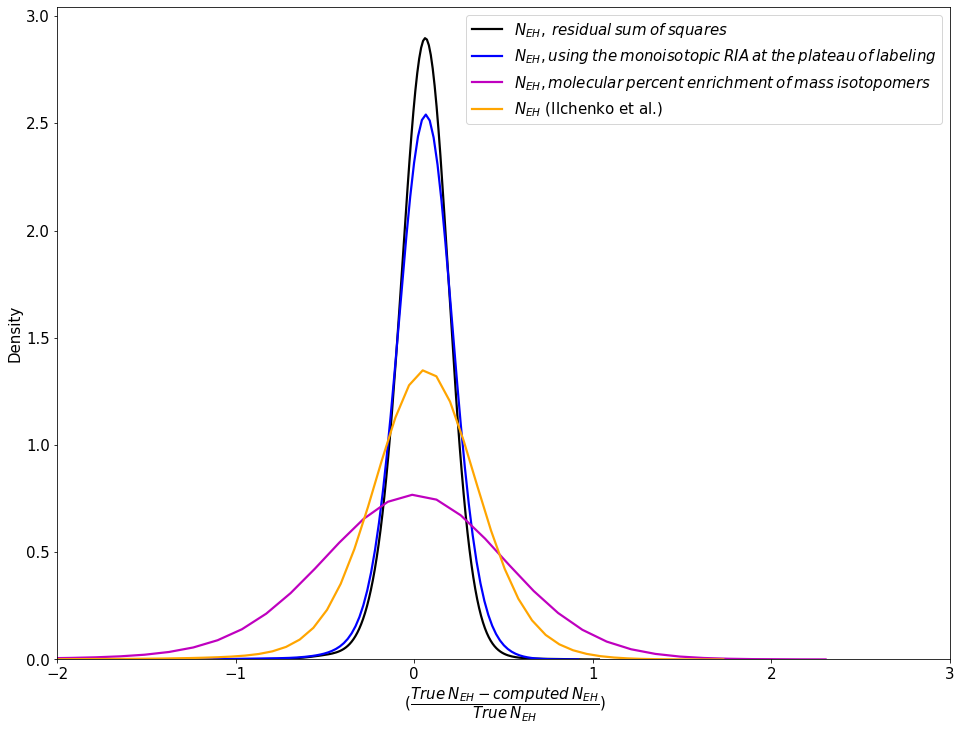

In [60]:
bw=0.75
bins=7000
lw=2.2
mtd="scott" 

plt.rc('font', size=15) 
plt.figure(figsize=(16,12))

sns.distplot(res[1], 
             hist = False,bins=bins, kde = True,color='k',
                 hist_kws={'alpha':0.3},
                     kde_kws = {'shade': False, 'linewidth': lw,'bw':bw,'bw_method':mtd} ,
             label=r"${N_{EH}},\:residual \:sum \:of \:squares$")

sns.distplot(res[0], 
             hist = False,bins=bins, kde = True,color='b',
                 hist_kws={'alpha':0.3},
                     kde_kws = {'shade': False, 'linewidth': lw,'bw':bw,'bw_method':mtd} ,
             label=r"${N_{EH}},using\: the\: monoisotopic\: RIA\: at\: the\: plateau\: of\: labeling$") 


sns.distplot(res[2], 
             hist = False,bins=bins, kde = True,color='m',
                 hist_kws={'alpha':0.3},
                     kde_kws = {'shade': False, 'linewidth': lw,'bw':bw,'bw_method':mtd} ,
             label=r"${N_{EH}},molecular\:percent\:enrichment\:of\:mass\:isotopomers$") 


sns.distplot(res[3], 
             hist = False,bins=bins, kde = True,color='orange',
                 hist_kws={'alpha':0.3},
                     kde_kws = {'shade': False, 'linewidth': lw,'bw':bw,'bw_method':mtd} ,
             label=r"$N_{EH}$ (Ilchenko et al.)") 

plt.xlabel(r' ($\dfrac { { True\: {N_{EH}} }- computed \:{N_{EH}} } { True\: {N_{EH}}}$)')
plt.legend(loc='upper right')
plt.xlim([-2,3])
# plt.vlines(x=0,ymin=0,ymax=7.7,ls="-.",color='r',alpha=0.7)

plt.savefig("density_4_lv.jpeg",dpi=900,bbox_inches='tight')

In [61]:
aa_sh_name={'Q':'Gln (Q)','N':'Asn (N)','S':'Ser (S)','G':'Gly (G)','T':'Thr (T)','A':'Ala (A)','D':'Asp (D)','P':'Pro (P)',
            'M':'Met (M)','V':'Val (V)','E':'Glu (E)','H':'His (H)','K':'Lys (K)','L':'Leu (L)','I':'Ile (I)','F':'Phe (F)',
            'C':'Cys (C)','Y':'Tyr (Y)','R':'Arg (R)','W':'Trp (W)',}

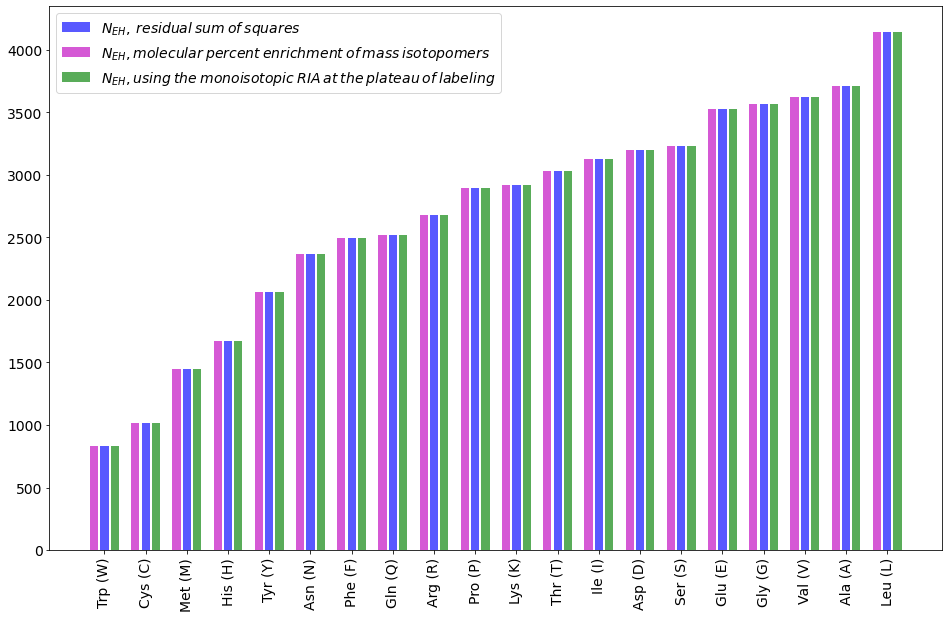

In [62]:
plt.rc('font', size=14) 
plt.figure(figsize=(16,10)) 
def plot_aa_count(data,filename,offset=0):
    color =['m','b','g'][offset]
    label=[r"${N_{EH}},molecular\:percent\:enrichment\:of\:mass\:isotopomers$",
           r"${N_{EH}},\:residual \:sum \:of \:squares$",
           r"${N_{EH}},using\: the\: monoisotopic\: RIA\: at\: the\: plateau\: of\: labeling$"][offset]
    res=dict()
    for pep in list(data['Peptide']):
        visited=set()
        for c in (pep):
            if c not in visited:
                res[c.upper()]=res.get(c.upper(),0)+1
                visited.add(c)
    res=np.array(sorted(res.items(),key= lambda item:item[1],reverse=False)) 
    
    temp=range(0,80,4)
    plt.bar([x+offset for x in temp],[int(x) for x in (res[:,1])],color=color,alpha=0.65,label=label)
#     plt.xticks([x+offset-1 for x in temp],res[:,0])
    plt.xticks([x+offset-1 for x in temp],[aa_sh_name[x] for x in res[:,0]],rotation=90)

#     for index, value in enumerate([int(x) for x in (res[:,1])]):
#         plt.text(value, index,
#                  str(value))

#     plt.savefig(filename,dpi=900,bbox_inches='tight')
#     plt.show()
plot_aa_count(data,"ape_aa_count.jpeg",1)
plot_aa_count(data,"mpe_aa_count.jpeg",0)
plot_aa_count(data,"asymp_aa_count.jpeg",2)

plt.legend()
plt.savefig("count_aa_eq.jpeg",dpi=900,bbox_inches='tight')